# NBA Birthplace Study

In [1]:
# Dependencies and Setup
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
draft_path = Path("Resources/cleaned_draft_data.csv")
draft_data = pd.read_csv(draft_path)
draft_data.head()

,_id,Name,Month,Day,Year,Position,College,Draft Year,Draft Round,Draft Pick,Career Games Played,Career Points Per Game,Total Career Points,Birth City,Birth State/Country
0,abdelal01,Alaa Abdelnaby,June,24,1968,Power Forward,Duke University,1990,1st round,25th overall,256,5.7,1459,Cairo,Egypt
1,abdulma02,Mahmoud Abdul-Rauf,March,9,1969,Point Guard,Louisiana State University,1990,1st round,3rd overall,586,14.6,8555,Gulfport,Mississippi
2,abdulta01,Tariq Abdul-Wahad,November,3,1974,Shooting Guard,"University of Michigan, San Jose State University",1997,1st round,11th overall,236,7.8,1840,Maisons Alfort,France
3,abdursh01,Shareef Abdur-Rahim,December,11,1976,Center and Small Forward and Power Forward,University of California,1996,1st round,3rd overall,830,18.1,15023,Marietta,Georgia
4,abrinal01,Alex Abrines,August,1,1993,Shooting Guard,No college,2013,2nd round,32nd overall,174,5.3,922,Palma de Mallorca,Spain


In [3]:
salaries_path = Path("Resources/cleaned_salary_data.csv")
salaries = pd.read_csv(salaries_path)
salaries.head()

,_id,Total Earnings,Inflation-Adjusted Earnings
0,abdelal01,2844000,6.304225e+06
1,abdulka01,8560000,2.406022e+07
2,abdulma02,19849500,4.177226e+07
3,abdulta01,37982800,6.558494e+07
4,abdursh01,95866000,1.630366e+08


In [4]:
full_data = pd.merge(draft_data, salaries, on="_id")
full_data.head()

,_id,Name,Month,Day,Year,Position,College,Draft Year,Draft Round,Draft Pick,Career Games Played,Career Points Per Game,Total Career Points,Birth City,Birth State/Country,Total Earnings,Inflation-Adjusted Earnings
0,abdelal01,Alaa Abdelnaby,June,24,1968,Power Forward,Duke University,1990,1st round,25th overall,256,5.7,1459,Cairo,Egypt,2844000,6.304225e+06
1,abdulma02,Mahmoud Abdul-Rauf,March,9,1969,Point Guard,Louisiana State University,1990,1st round,3rd overall,586,14.6,8555,Gulfport,Mississippi,19849500,4.177226e+07
2,abdulta01,Tariq Abdul-Wahad,November,3,1974,Shooting Guard,"University of Michigan, San Jose State University",1997,1st round,11th overall,236,7.8,1840,Maisons Alfort,France,37982800,6.558494e+07
3,abdursh01,Shareef Abdur-Rahim,December,11,1976,Center and Small Forward and Power Forward,University of California,1996,1st round,3rd overall,830,18.1,15023,Marietta,Georgia,95866000,1.630366e+08
4,abrinal01,Alex Abrines,August,1,1993,Shooting Guard,No college,2013,2nd round,32nd overall,174,5.3,922,Palma de Mallorca,Spain,11719764,1.504430e+07


## AVERAGE EARNINGS BY BIRTH COUNTRY AND BIRTH CITY

In [5]:
countries = full_data.groupby("Birth State/Country")
top_countries = countries["Total Earnings"].mean().sort_values(ascending=False)[:10]
display(top_countries.head())

Birth State/Country
 U.S. VirgIslands         2.434717e+08
 South Africa             1.469366e+08
 South Dakota             9.317691e+07
 Republic of the Congo    7.512739e+07
 Argentina                7.230628e+07
Name: Total Earnings, dtype: float64

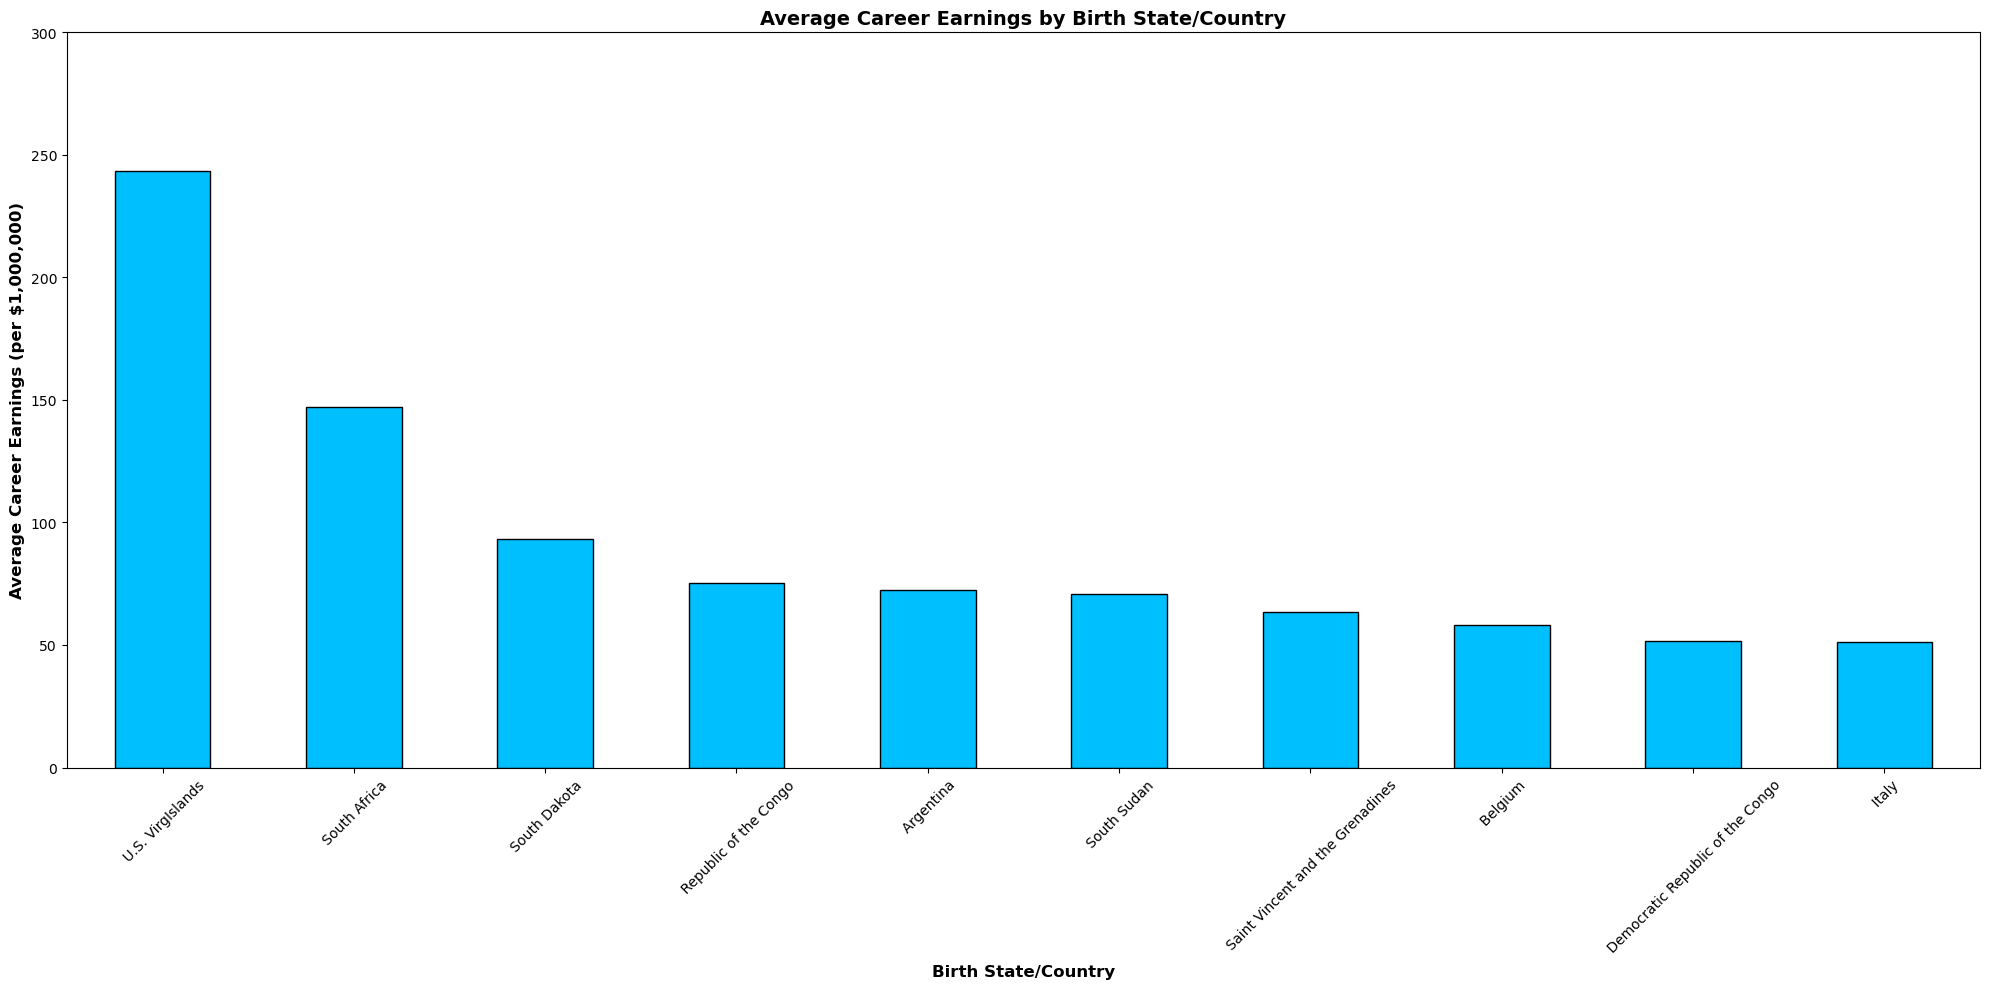

In [6]:
plt.figure(figsize=(20, 10))
top_countries.plot(kind='bar', color='deepskyblue', edgecolor='black')
plt.title('Average Career Earnings by Birth State/Country', size=14, weight='bold')
plt.xlabel('Birth State/Country', size=12, weight='bold')
plt.ylabel('Average Career Earnings (per $1,000,000)', size=12, weight='bold')
plt.xticks(rotation=45)

ylocs, ylabels = plt.yticks()
ylabels = [int(float(label.get_text()) * 100) for label in ylabels]
plt.yticks(ylocs, labels=ylabels)

plt.tight_layout()
plt.savefig("Resources/birthcountry_earnings.png", bbox_inches='tight')
plt.show()

In [7]:
countries = full_data.groupby("Birth State/Country")
top_countries = countries["Total Earnings"].mean().sort_values(ascending=False)
display(top_countries.head())

Birth State/Country
 U.S. VirgIslands         2.434717e+08
 South Africa             1.469366e+08
 South Dakota             9.317691e+07
 Republic of the Congo    7.512739e+07
 Argentina                7.230628e+07
Name: Total Earnings, dtype: float64

In [8]:
cities = full_data.groupby("Birth City")
top_cities = cities["Total Earnings"].mean().sort_values(ascending=False)[:10]
display(top_cities.head())

Birth City
Mauldin      343872398.0
Wurzburg     250371801.0
St. Croix    243471655.0
Merced       184356410.0
Hanford      173496273.0
Name: Total Earnings, dtype: float64

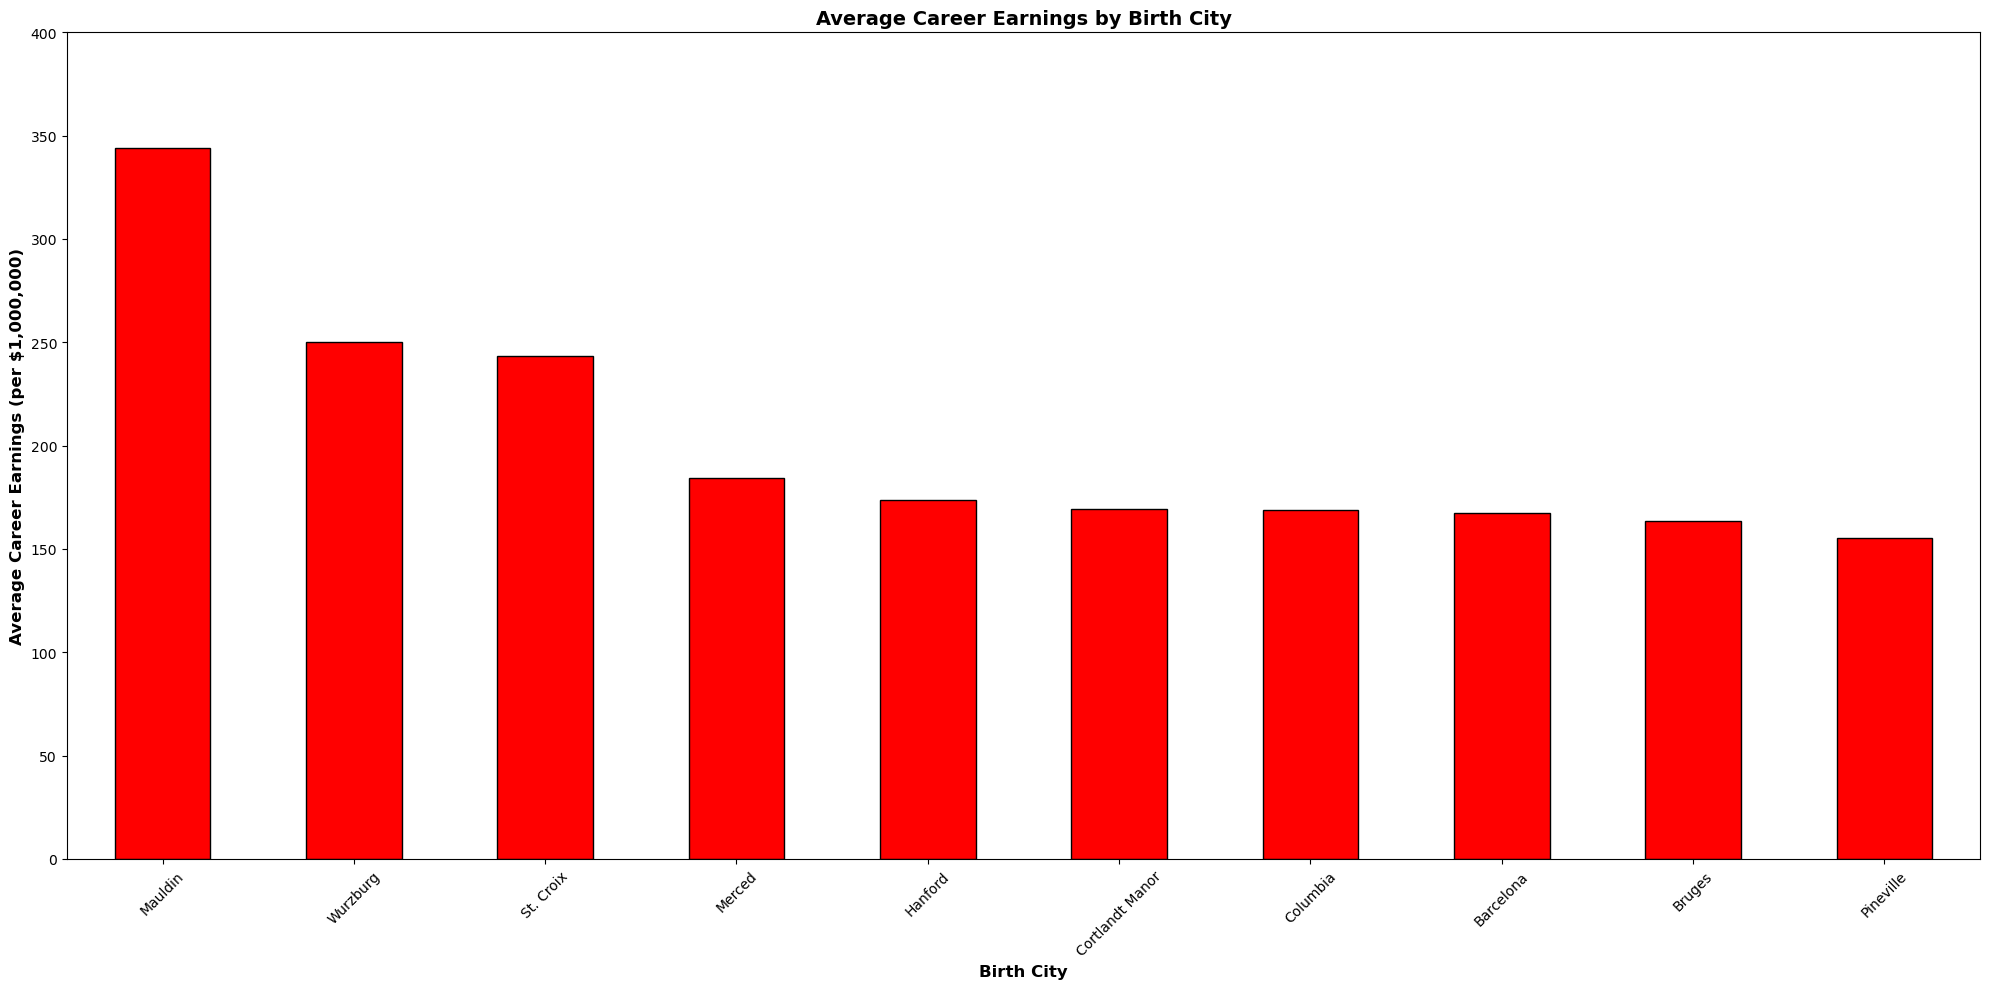

In [9]:
plt.figure(figsize=(20, 10))
top_cities.plot(kind='bar', color='red', edgecolor='black')
plt.title('Average Career Earnings by Birth City', size=14, weight='bold')
plt.xlabel('Birth City', size=12, weight='bold')
plt.ylabel('Average Career Earnings (per $1,000,000)', size=12, weight='bold')
plt.xticks(rotation=45)

ylocs, ylabels = plt.yticks()
ylabels = [int(float(label.get_text()) * 100) for label in ylabels]
plt.yticks(ylocs, labels=ylabels)

plt.tight_layout()
plt.savefig("Resources/birthcity_earnings.png", bbox_inches='tight')
plt.show()

## TOTAL EARNINGS BY BIRTH COUNTRY AND BIRTH CITY

In [10]:
countries_total = full_data.groupby("Birth State/Country")
top_countries_total = countries_total ["Total Earnings"].sum().sort_values(ascending=False)[:10]
display(top_countries_total.head())

Birth State/Country
 California      4508537901
 New York        2434134743
 Illinois        2306184625
 Texas           1729460874
 Pennsylvania    1678558835
Name: Total Earnings, dtype: int64

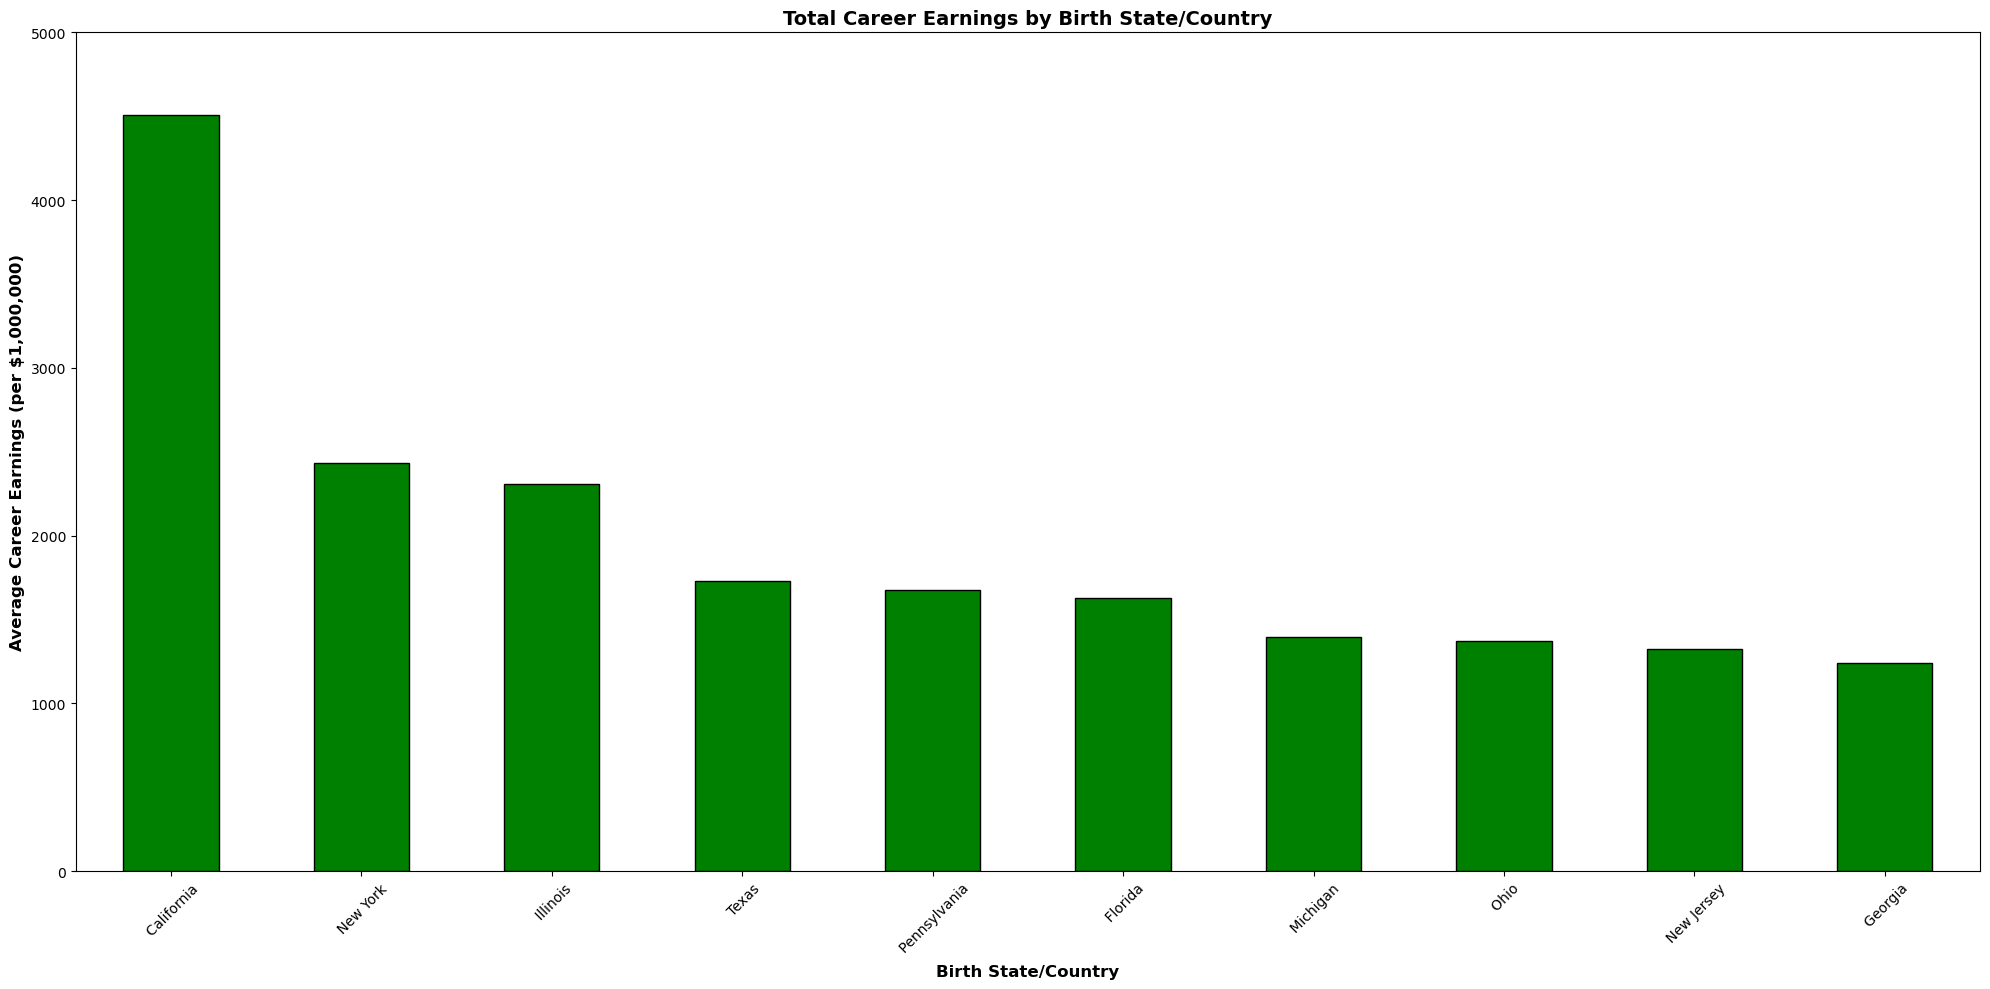

In [11]:
plt.figure(figsize=(20, 10))
top_countries_total.plot(kind='bar', color='green', edgecolor='black')
plt.title('Total Career Earnings by Birth State/Country', size=14, weight='bold')
plt.xlabel('Birth State/Country', size=12, weight='bold')
plt.ylabel('Average Career Earnings (per $1,000,000)', size=12, weight='bold')
plt.xticks(rotation=45)

ylocs, ylabels = plt.yticks()
ylabels = [int(float(label.get_text()) * 1000) for label in ylabels]
plt.yticks(ylocs, labels=ylabels)

plt.tight_layout()
plt.savefig("Resources/birthcountry_earnings_total.png", bbox_inches='tight')
plt.show()

In [12]:
cities_total = full_data.groupby("Birth City")
top_cities_total =cities_total ["Total Earnings"].sum().sort_values(ascending=False)[:10]
display(top_cities_total.head())

Birth City
Chicago         1278814791
Philadelphia    1187554954
Los Angeles     1177600910
Dallas           800154191
Oakland          615842609
Name: Total Earnings, dtype: int64

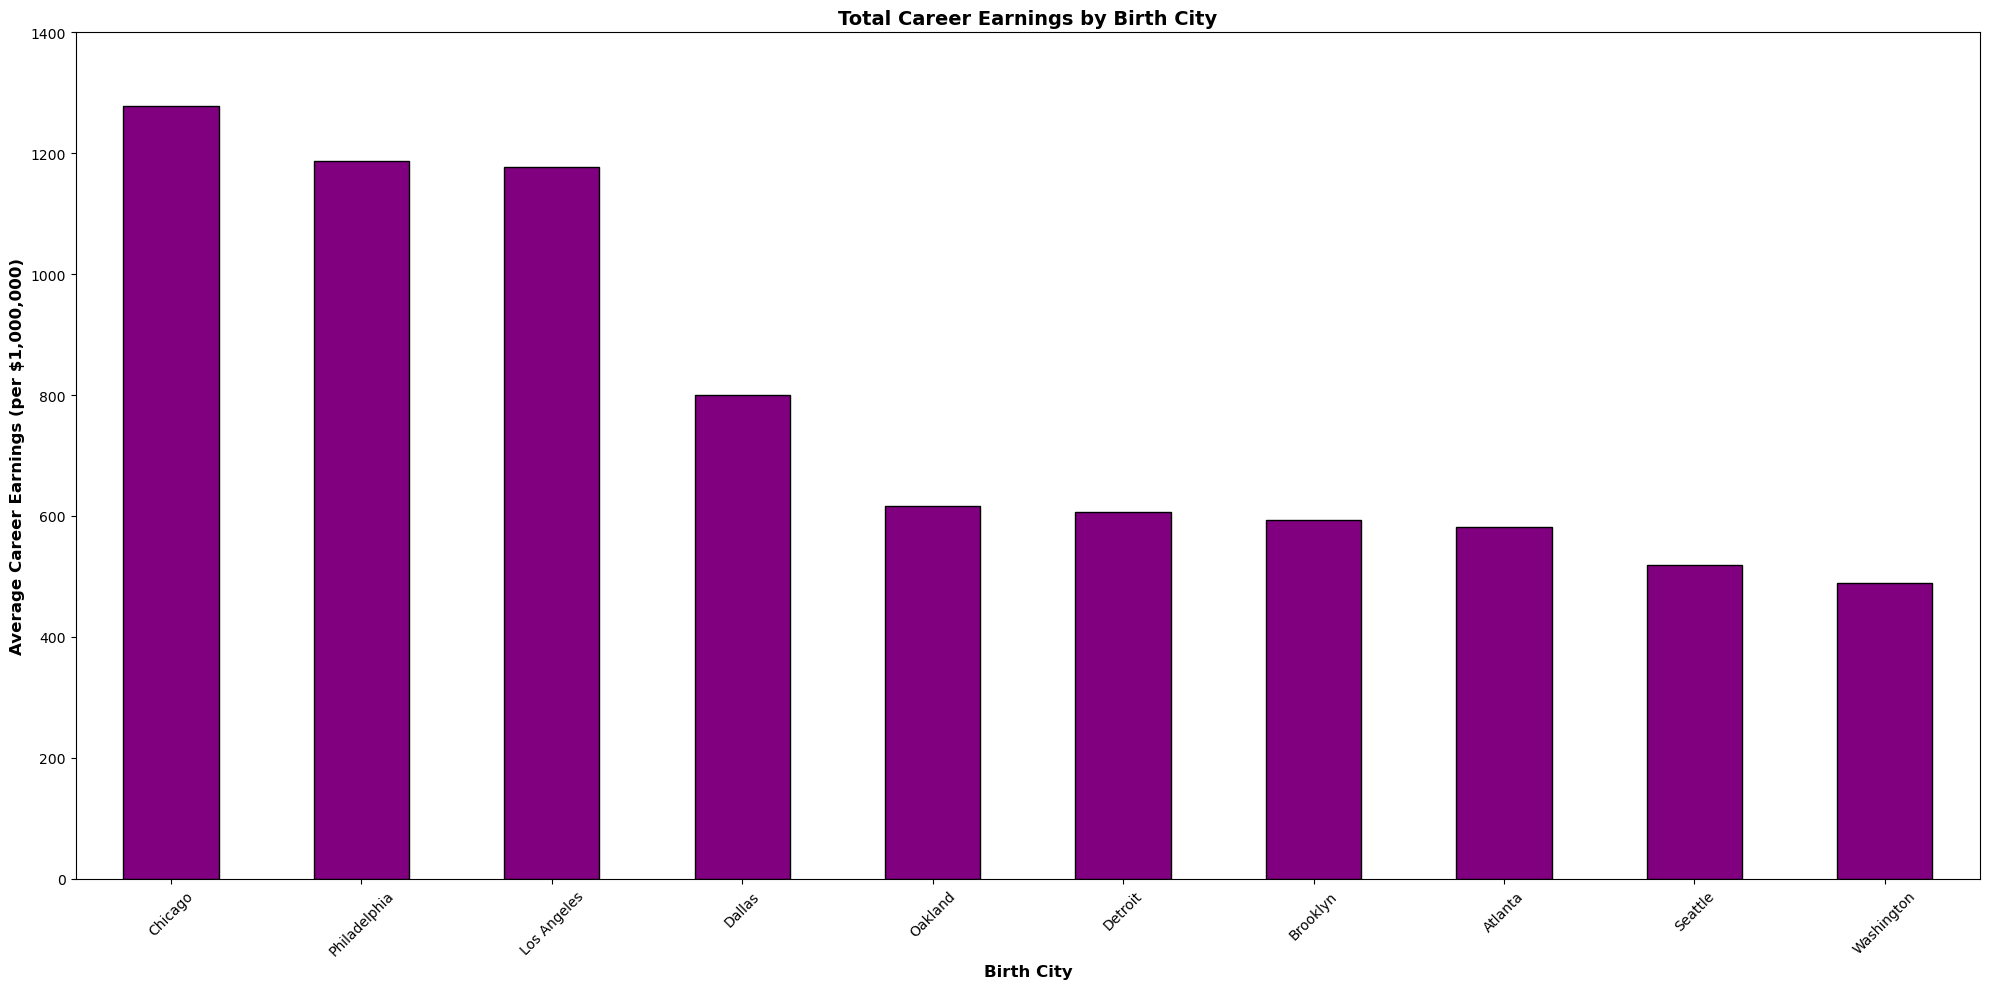

In [13]:
plt.figure(figsize=(20, 10))
top_cities_total.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Total Career Earnings by Birth City', size=14, weight='bold')
plt.xlabel('Birth City', size=12, weight='bold')
plt.ylabel('Average Career Earnings (per $1,000,000)', size=12, weight='bold')
plt.xticks(rotation=45)

ylocs, ylabels = plt.yticks()
ylabels = [int(float(label.get_text()) * 1000) for label in ylabels]
plt.yticks(ylocs, labels=ylabels)

plt.tight_layout()
plt.savefig("Resources/birthcity_earnings_total.png", bbox_inches='tight')
plt.show()

## MOST NBA PLAYERS BY BIRTH COUNTRY AND CITY 

In [14]:
players = full_data.groupby("Birth State/Country")
total_players = players["_id"].count().sort_values(ascending=False)[:10]
display(total_players.head())

Birth State/Country
 California    170
 New York       98
 Illinois       78
 Texas          60
 Georgia        57
Name: _id, dtype: int64

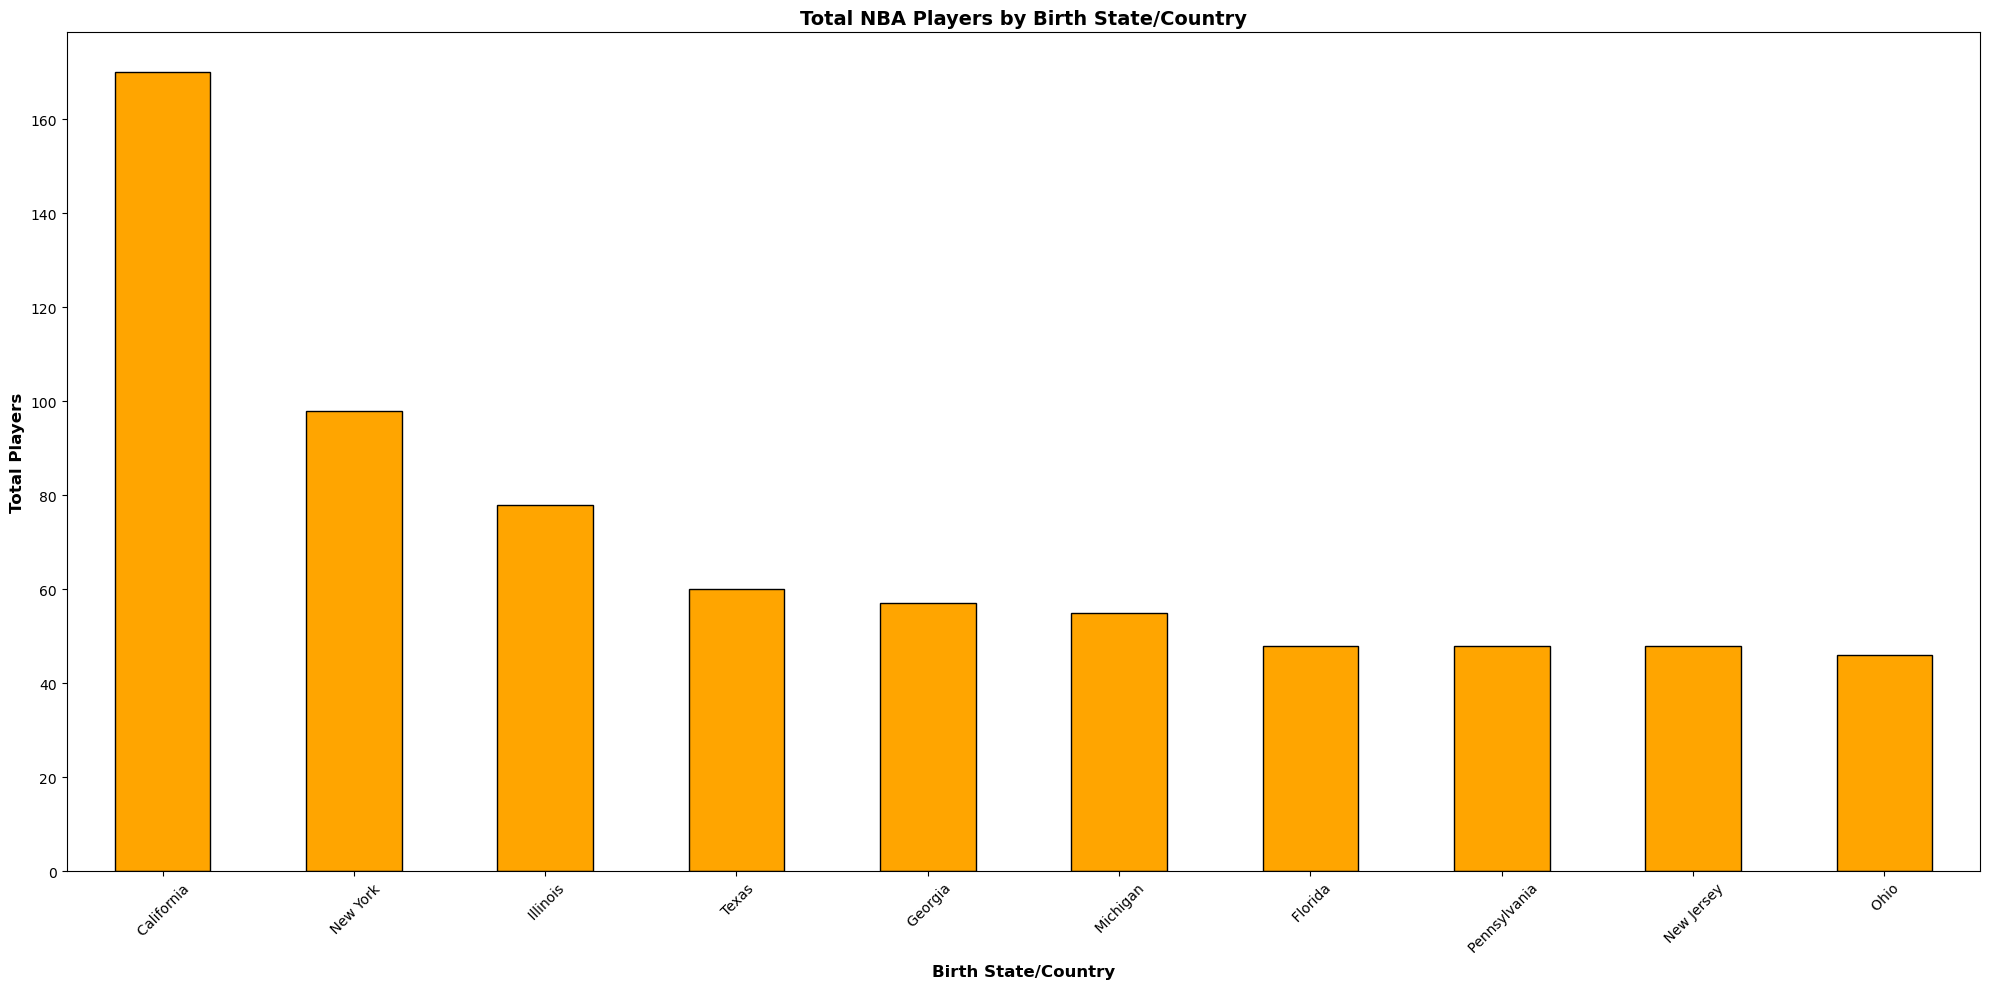

In [15]:
plt.figure(figsize=(20, 10))
total_players.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Total NBA Players by Birth State/Country', size=14, weight='bold')
plt.xlabel('Birth State/Country', size=12, weight='bold')
plt.ylabel('Total Players', size=12, weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Resources/birthcountry_player_numbers.png", bbox_inches='tight')
plt.show()

In [16]:
players = full_data.groupby("Birth City")
total_players = players["_id"].count().sort_values(ascending=False)[:10]
display(total_players.head())

Birth City
Los Angeles     49
Chicago         37
Philadelphia    30
Washington      26
Detroit         26
Name: _id, dtype: int64

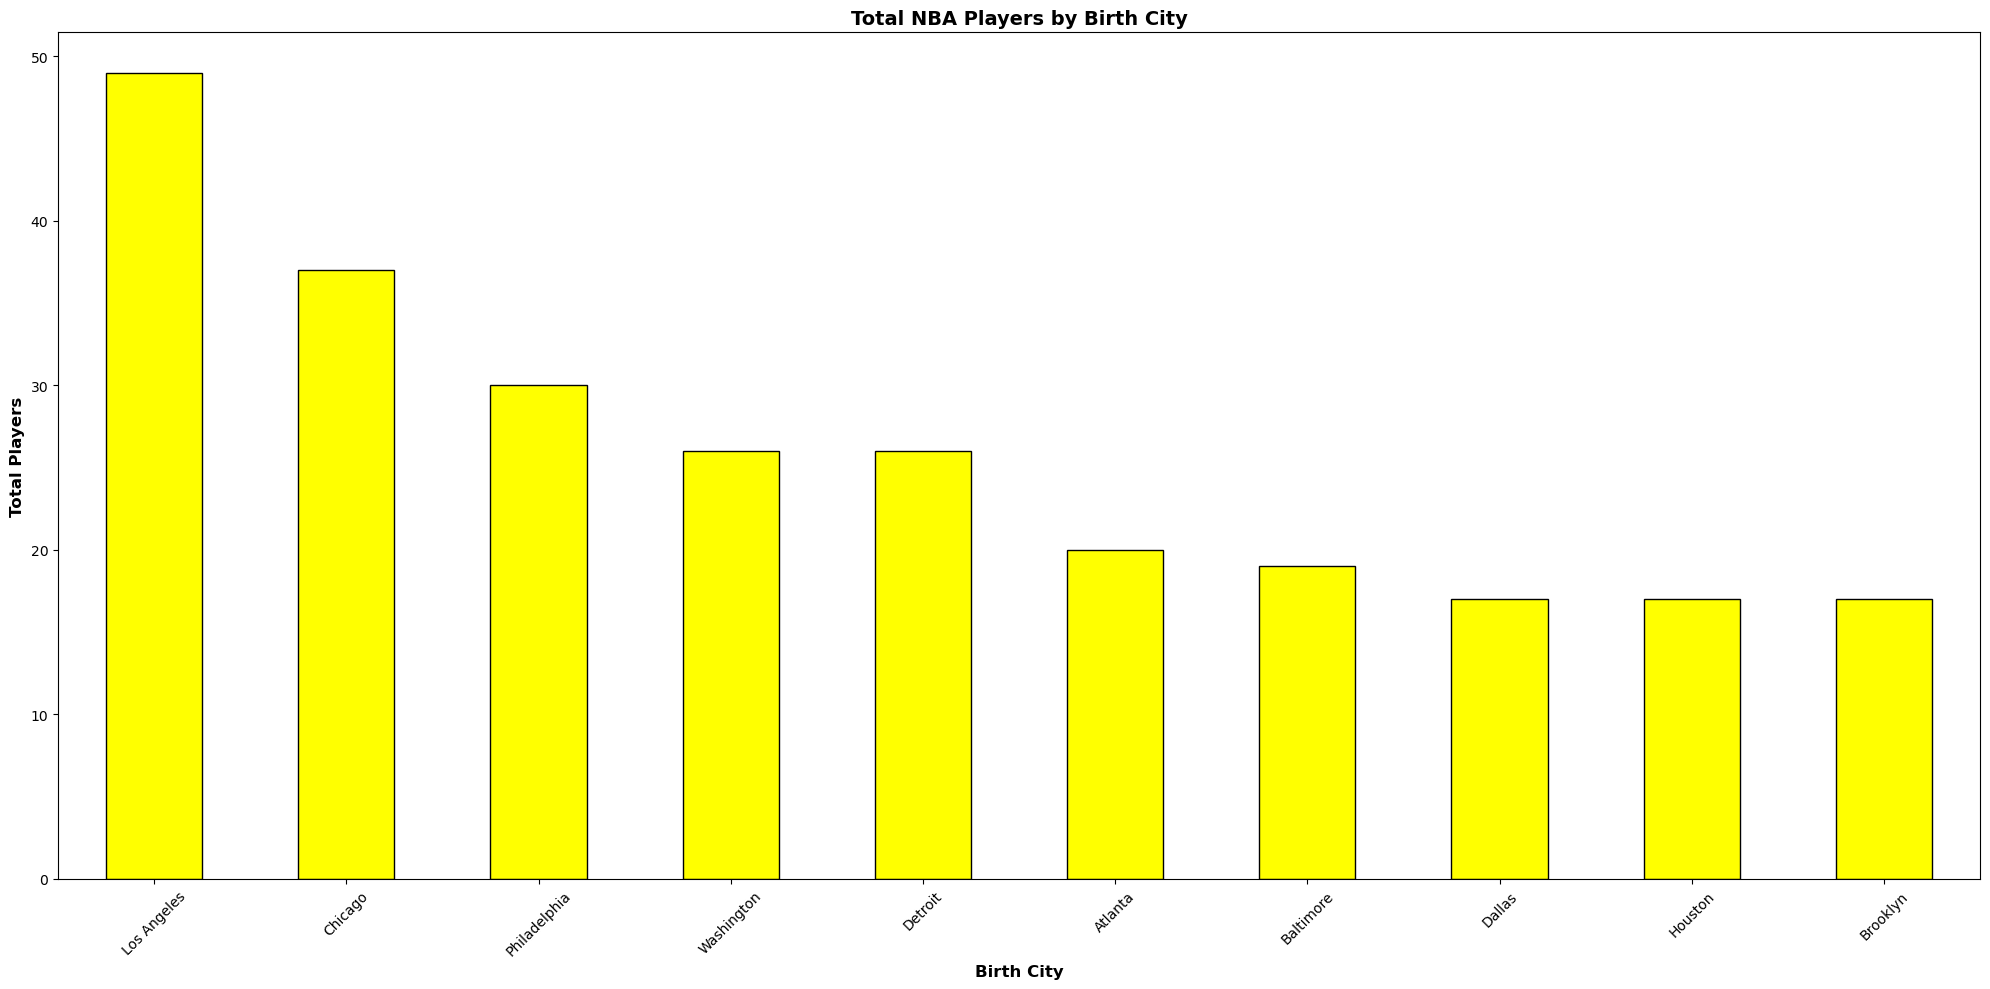

In [17]:
plt.figure(figsize=(20, 10))
total_players.plot(kind='bar', color='yellow', edgecolor='black')
plt.title('Total NBA Players by Birth City', size=14, weight='bold')
plt.xlabel('Birth City', size=12, weight='bold')
plt.ylabel('Total Players', size=12, weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## BIRTH COUNTRY AND CITY THAT PRODUCE THE BEST NBA PLAYERS

In [18]:
points_by_country = full_data.groupby("Birth State/Country")
total_points_by_country = points_by_country["Total Career Points"].sum().sort_values(ascending=False)[:10]
display(total_points_by_country.head())

Birth State/Country
 California      684660
 New York        375047
 Illinois        355588
 Pennsylvania    256367
 Florida         247283
Name: Total Career Points, dtype: int64

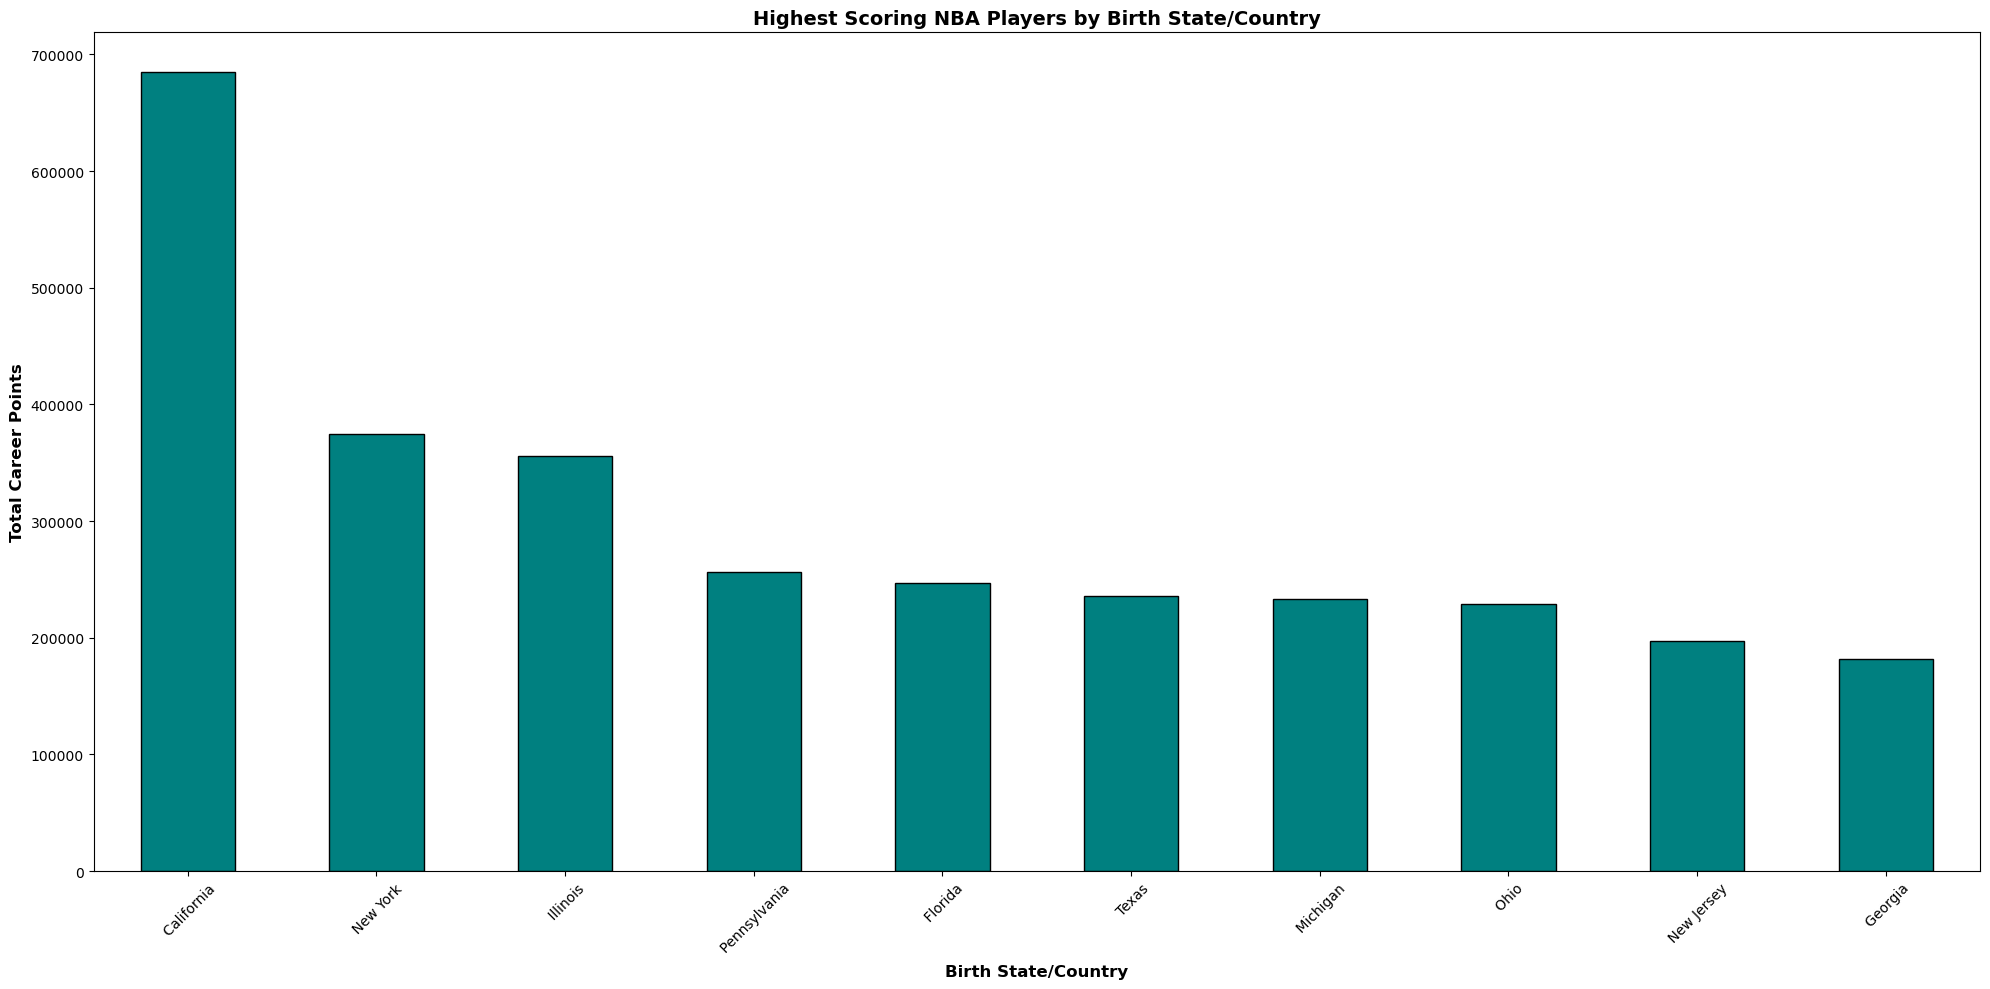

In [19]:
plt.figure(figsize=(20, 10))
total_points_by_country.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Highest Scoring NBA Players by Birth State/Country', size=14, weight='bold')
plt.xlabel('Birth State/Country', size=12, weight='bold')
plt.ylabel('Total Career Points', size=12, weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
points_by_city = full_data.groupby("Birth City")
total_points_by_city = points_by_city["Total Career Points"].sum().sort_values(ascending=False)[:10]
display(total_points_by_city.head())

Birth City
Chicago         198936
Los Angeles     180247
Philadelphia    163933
Oakland         104393
Detroit          98336
Name: Total Career Points, dtype: int64

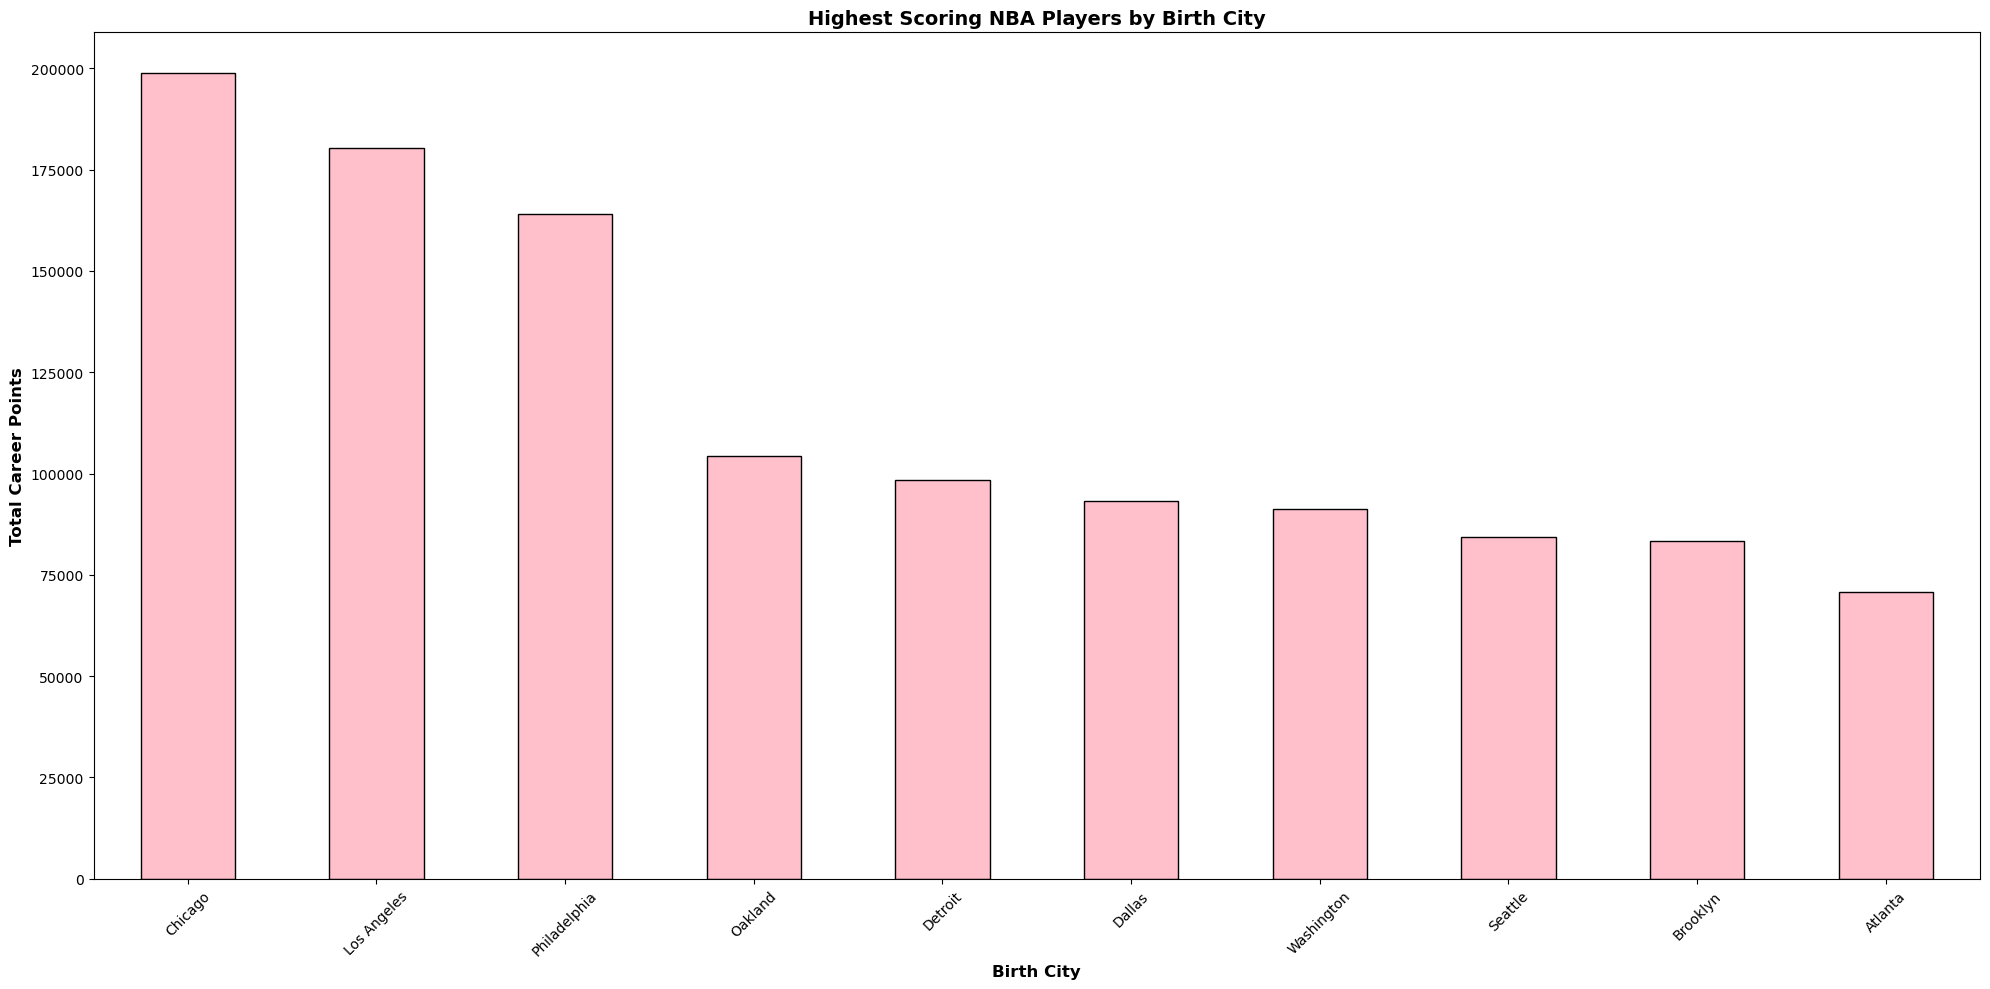

In [21]:
plt.figure(figsize=(20, 10))
total_points_by_city.plot(kind='bar', color='pink', edgecolor='black')
plt.title('Highest Scoring NBA Players by Birth City', size=14, weight='bold')
plt.xlabel('Birth City', size=12, weight='bold')
plt.ylabel('Total Career Points', size=12, weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
games_by_country = full_data.groupby("Birth State/Country")
total_games_by_country = games_by_country["Career Games Played"].sum().sort_values(ascending=False)[:10]
display(total_games_by_country.head())

Birth State/Country
 California      67915
 New York        35680
 Illinois        32072
 Texas           23662
 Pennsylvania    22919
Name: Career Games Played, dtype: int64

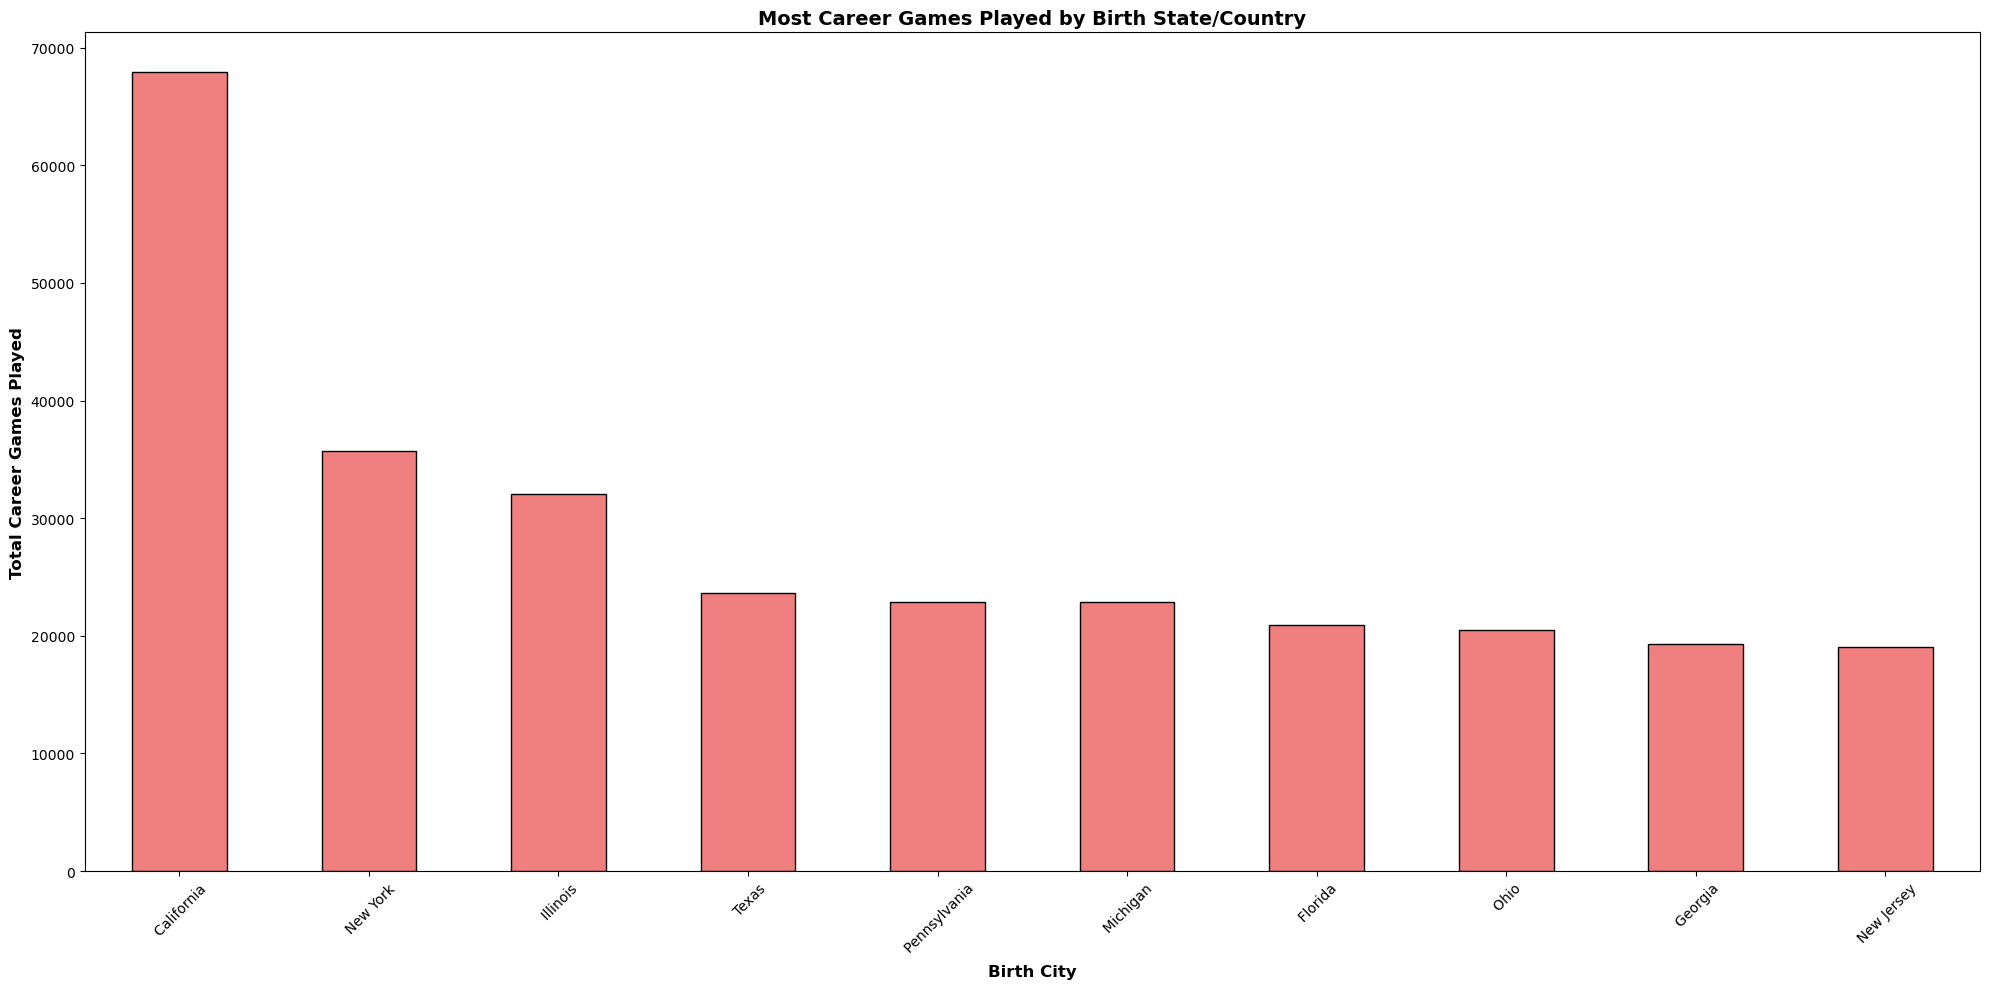

In [23]:
plt.figure(figsize=(20, 10))
total_games_by_country.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Most Career Games Played by Birth State/Country', size=14, weight='bold')
plt.xlabel('Birth City', size=12, weight='bold')
plt.ylabel('Total Career Games Played', size=12, weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
games_by_city = full_data.groupby("Birth City")
total_games_by_city = games_by_city["Career Games Played"].sum().sort_values(ascending=False)[:10]
display(total_games_by_city.head())

Birth City
Los Angeles     18485
Chicago         16616
Philadelphia    14518
Detroit         10178
Washington       9770
Name: Career Games Played, dtype: int64

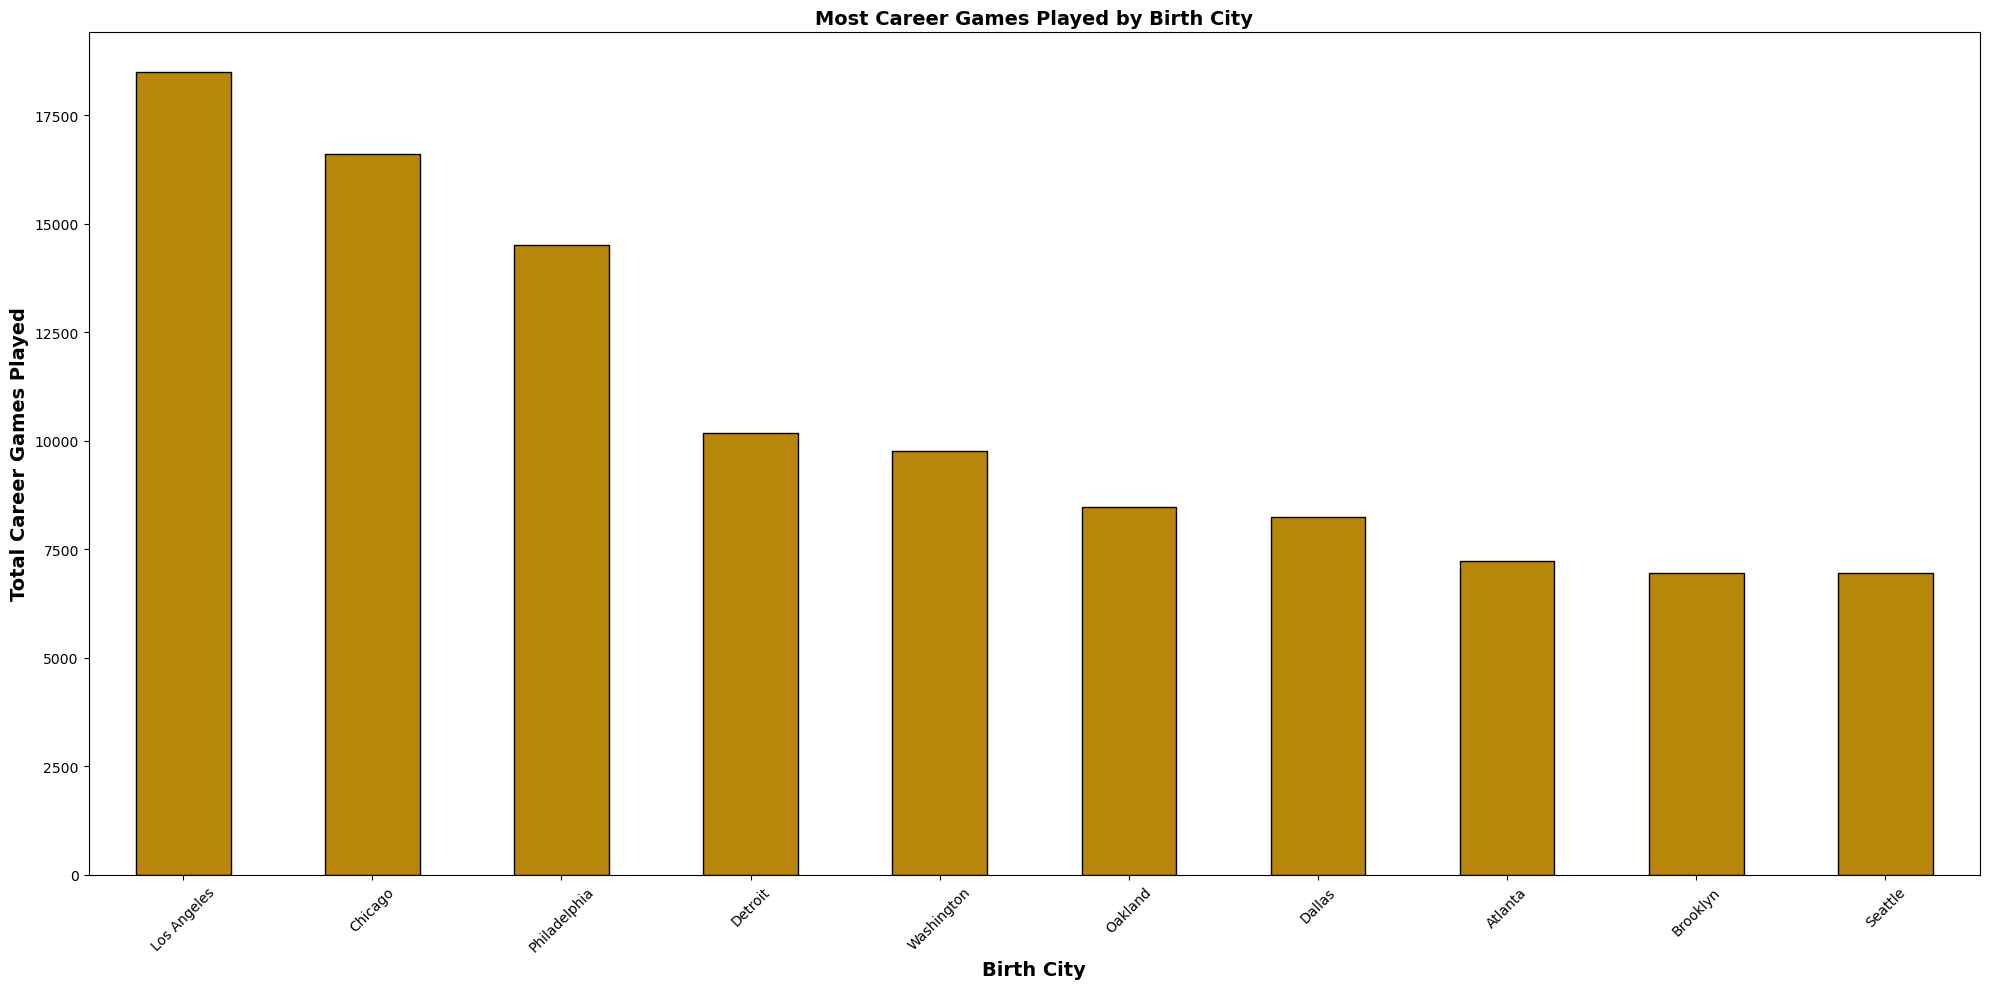

In [25]:
plt.figure(figsize=(20, 10))
total_games_by_city.plot(kind='bar', color='darkgoldenrod', edgecolor='black')
plt.title('Most Career Games Played by Birth City', size=14, weight='bold')
plt.xlabel('Birth City', size=14, weight='bold')
plt.ylabel('Total Career Games Played', size=14, weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()